In [105]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math



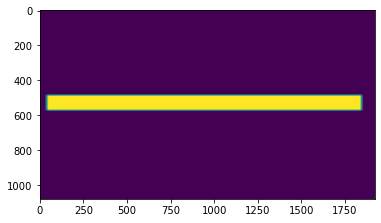

In [106]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 45 #マスク範囲開始位置 Y座標
boxToX = 95 #マスク範囲終了位置 X座標
boxToY = 52 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

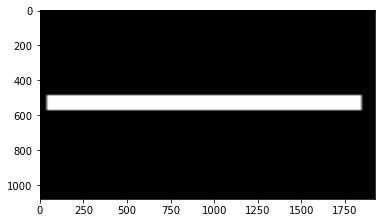

In [107]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

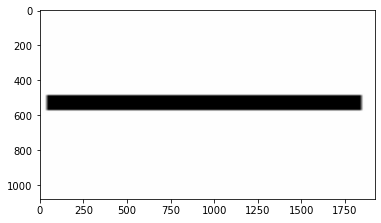

In [108]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

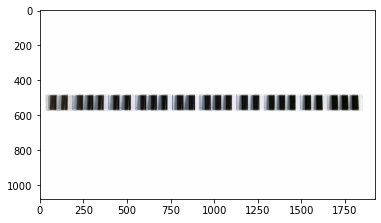

In [109]:
im_1 = cv2.imread("./imagefile/tryout/img_101.jpg", cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')
plt.imshow(im_1)
plt.imshow(im_mask)
im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out1.jpg', im_out)
plt.imshow(im_out)

In [110]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

threshold=70

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

0 外接矩形の座標
[[ 58 490]
 [ 92 490]
 [ 92 568]
 [ 58 568]] 

1 外接矩形の座標
[[1784  489]
 [1821  487]
 [1824  568]
 [1787  569]] 

2 外接矩形の座標
[[1726  489]
 [1763  488]
 [1765  568]
 [1729  569]] 

3 外接矩形の座標
[[1670  489]
 [1706  489]
 [1706  569]
 [1670  569]] 

4 外接矩形の座標
[[1580  489]
 [1615  488]
 [1617  568]
 [1582  569]] 

5 外接矩形の座標
[[1515  489]
 [1550  488]
 [1551  568]
 [1517  569]] 

6 外接矩形の座標
[[1430  489]
 [1461  489]
 [1461  568]
 [1430  568]] 

7 外接矩形の座標
[[1370  489]
 [1402  489]
 [1402  568]
 [1370  568]] 

8 外接矩形の座標
[[1311  489]
 [1342  489]
 [1342  568]
 [1311  568]] 

9 外接矩形の座標
[[1220  489]
 [1254  489]
 [1254  568]
 [1220  568]] 

10 外接矩形の座標
[[1154  489]
 [1188  489]
 [1188  568]
 [1154  568]] 

11 外接矩形の座標
[[1064  489]
 [1096  489]
 [1096  568]
 [1064  568]] 

12 外接矩形の座標
[[1003  489]
 [1036  489]
 [1036  568]
 [1003  568]] 

13 外接矩形の座標
[[943 489]
 [975 489]
 [975 568]
 [943 568]] 

14 外接矩形の座標
[[850 489]
 [885 489]
 [885 568]
 [850 568]] 

15 外接矩形の座標
[[785 489]
 [821 489]
 [821 568]


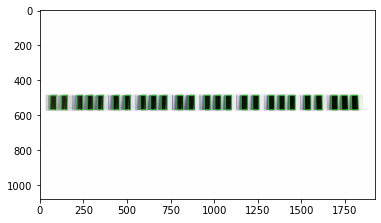

In [111]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))
#基準どうやって決める？

xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [112]:
print(xleft)

[58, 1784, 1726, 1670, 1580, 1515, 1430, 1370, 1311, 1220, 1154, 1064, 1003, 943, 850, 785, 695, 634, 575, 484, 419, 331, 271, 212, 122]


In [113]:
print(xright)

[92, 1824, 1765, 1706, 1617, 1551, 1461, 1402, 1342, 1254, 1188, 1096, 1036, 975, 885, 821, 727, 667, 607, 517, 453, 362, 303, 244, 155]


In [114]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [115]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[58, 122, 212, 271, 331, 419, 484, 575, 634, 695, 785, 850, 943, 1003, 1064, 1154, 1220, 1311, 1370, 1430, 1515, 1580, 1670, 1726, 1784]
[92, 155, 244, 303, 362, 453, 517, 607, 667, 727, 821, 885, 975, 1036, 1096, 1188, 1254, 1342, 1402, 1461, 1551, 1617, 1706, 1765, 1824]


In [116]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 568),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [117]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [118]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>50:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 58], [92, 122], [155, 212], [244, 271], [303, 331], [362, 419], [453, 484], [517, 575], [607, 634], [667, 695], [727, 785], [821, 850], [885, 943], [975, 1003], [1036, 1064], [1096, 1154], [1188, 1220], [1254, 1311], [1342, 1370], [1402, 1430], [1461, 1515], [1551, 1580], [1617, 1670], [1706, 1726], [1765, 1784], [1824, 1920]]
[[0, 29], [29, 58], [92, 122], [155, 183], [184, 212], [244, 271], [303, 331], [362, 390], [391, 419], [453, 484], [517, 546], [546, 575], [607, 634], [667, 695], [727, 756], [756, 785], [821, 850], [885, 914], [914, 943], [975, 1003], [1036, 1064], [1096, 1125], [1125, 1154], [1188, 1220], [1254, 1282], [1283, 1311], [1342, 1370], [1402, 1430], [1461, 1488], [1488, 1515], [1551, 1580], [1617, 1643], [1644, 1670], [1706, 1726], [1765, 1784], [1824, 1872], [1872, 1920]]


In [119]:
print(hakken)

[[0, 29], [29, 58], [92, 122], [155, 183], [184, 212], [244, 271], [303, 331], [362, 390], [391, 419], [453, 484], [517, 546], [546, 575], [607, 634], [667, 695], [727, 756], [756, 785], [821, 850], [885, 914], [914, 943], [975, 1003], [1036, 1064], [1096, 1125], [1125, 1154], [1188, 1220], [1254, 1282], [1283, 1311], [1342, 1370], [1402, 1430], [1461, 1488], [1488, 1515], [1551, 1580], [1617, 1643], [1644, 1670], [1706, 1726], [1765, 1784], [1824, 1872], [1872, 1920]]


In [120]:
print(kokken)

[[58, 92], [122, 155], [212, 244], [271, 303], [331, 362], [419, 453], [484, 517], [575, 607], [634, 667], [695, 727], [785, 821], [850, 885], [943, 975], [1003, 1036], [1064, 1096], [1154, 1188], [1220, 1254], [1311, 1342], [1370, 1402], [1430, 1461], [1515, 1551], [1580, 1617], [1670, 1706], [1726, 1765], [1784, 1824]]


[[0, 29], [29, 58], [92, 122], [155, 183], [184, 212], [244, 271], [303, 331], [362, 390], [391, 419], [453, 484], [517, 546], [546, 575], [607, 634], [667, 695], [727, 756], [756, 785], [821, 850], [885, 914], [914, 943], [975, 1003], [1036, 1064], [1096, 1125], [1125, 1154], [1188, 1220], [1254, 1282], [1283, 1311], [1342, 1370], [1402, 1430], [1461, 1488], [1488, 1515], [1551, 1580], [1617, 1643], [1644, 1670], [1706, 1726], [1765, 1784], [1824, 1872], [1872, 1920]]


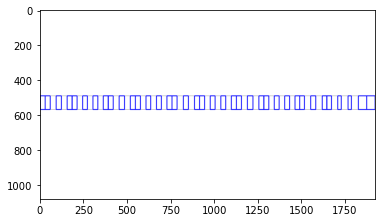

In [121]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [122]:
#音の高さを検出
n=0 #右から何番目かを入力　右端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
sum=0
k=1
while i>=0:
    sum+=nanabit[i]*k
    k*=2
    i-=1

print(sum)

29 29
155 122
184 183
303 271
362 331
[1, 1, 0, 1, 1, 0, 0]
108


In [123]:
if sum==24:hstart=0
if sum==51:hstart=1
if sum==102:hstart=2
if sum==12:hstart=3
if sum==27:hstart=4
if sum==54:hstart=5
if sum==108:hstart=6


In [124]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[doremi[(hstart+i)%7]]
    i+=1
print(hakkendoremi)

['B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']


True

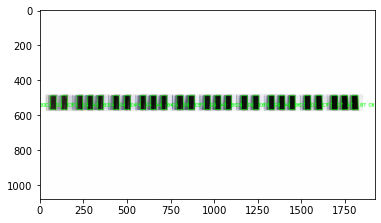

In [125]:
#base2 = cv2.imread("./after/white_resize.jpg")
base2=im_out
i=0
while i<len(hakken):
    cv2.putText(base2,
            text=(str(doremi[(hstart+i)%7])+str(math.ceil(i/7)+2)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-13,550),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.8,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base2)
cv2.imwrite("./after/doremi.jpg",base2)

In [126]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4

True

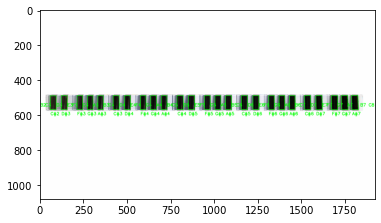

In [127]:
i=0
sharp=["C#","D#","F#","G#","A#"]
while i<len(kokken):
    cv2.putText(base2,
            text=(str(sharp[(bstart+i)%5])+str(math.ceil(i/5)+2)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-15,600),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.8,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base2)
cv2.imwrite("./after/doremi.jpg",base2)

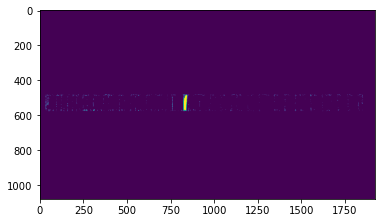

In [128]:
#ここから画像の比較
import cv2
import matplotlib.pyplot as plt

img_1 = cv2.imread('./after/out.jpg',1)
img_2 = cv2.imread('./after/out1.jpg',1)


img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

#画像を引き算
img_diff = cv2.absdiff(img_1_gray, img_2_gray)

#2値化
ret2,img_th = cv2.threshold(img_diff,20,255,cv2.THRESH_BINARY)





plt.imshow(img_th)




True

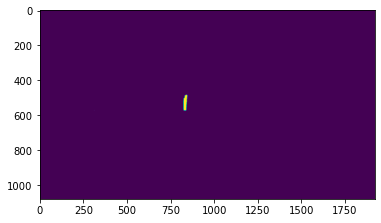

In [129]:

 # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
ksize=7
#中央値フィルタ
img_mask = cv2.medianBlur(img_th,ksize)
plt.imshow(img_mask)
cv2.imwrite("./after/sa.jpg",img_mask)

In [130]:
#輪郭を検出
contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#閾値以上の差分を四角で囲う
for i,cnt in enumerate(contours):
    x, y, width, height = cv2.boundingRect(cnt)
    #if width > 50 or height > 50:
    cv2.rectangle(img_1, (x, y), (x+width, y+height), (0, 0, 255), 1)
    



In [131]:
cv2.imwrite("diff.jpg", img_1)
cv2.imshow("diff",img_1)
#cv2.waitKey(0)

In [132]:
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)



831 529


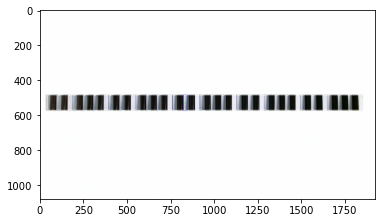

In [133]:
cv2.rectangle(img_1,(cx,cy),(cx+1,cy+1),(0,255,0),3)
plt.imshow(img_1)

In [134]:
i=0
while hakken[i+1][0]<cx:
    i+=1
print(str(doremi[(hstart+i)%7]+str(math.ceil(i/7)+2)))

D5
